<br>

<center> <strong> <font face="Courier New" size=5> Reinforcement Learning </font> </strong> </center>
<br>
<center>  <strong> <font face="Courier New" size=6 color='#24C0C4'> Bono 1. Multi-Armed Bandit no estacionario </font> </strong> </center>

<br>
<center> <p> Docente: Fernando Enrique Lozano Martinez </p>
 <p> 
 Estudiante: <br>
 Manuela Viviana Chacón Chamorro <br>
</p>
</center>

<br> 
<p> IELE <br> 
Facultad de Ingeniería <br>
Universidad de los Andes <br>
2023
</p>

---

In [230]:
# Librerias 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math
import pandas as pd

# Configuración general de gráficas 
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Semillas
np.random.seed(202301) 
random.seed(202301)

# Enunciado 

<p align="justify">
En el problema de <em>Multi Armed Bandit</em> se seleccionan acciones en t = 1, 2, . . . , 1000. Suponga que se tienen 12 acciones y cada  acción $i$ tiene una recompensa distribuida normalmente con media $\mu_i = \beta_i + \cos(w_0 t)$ y varianza 1, donde $\beta_i$ a su vez se selecciona de una distribución normal con media cero y varianza 1. La selección de la acción se hace de manera \epsilon$-greedy y el valor estimado de la acción seleccionada es:

$$Q_{n+1} = Q_{n} + \alpha_n(R_n - Q_n)$$

Discuta cómo se debería seleccionar $\alpha_n$ en los siguientes casos:
- **Caso 1:** $w_0 = \pi / 100000$
- **Caso 2:** $w_0 = \pi / 1000$

# Análisis general

<p align="justify">
El problema que se presenta es un problema de "Multiarmed Bandit" en el que se busca encontrar la mejor acción a elegir para maximizar el valor esperado. Sin embargo, a diferencia de los problemas de estándar, las acciones no tienen una media constante, sino que están afectadas por un factor determinístico $\cos(w_0t)$ que provoca un desplazamiento cíclico en la media de cada acción.
<p align="justify">
Para encontrar la mejor acción en este contexto, es necesario sintonizar el parámetro $\alpha_n$ de manera que se tenga en cuenta el factor cíclico que afecta la media de cada acción. En la solución se espera que se eliga la mayoria de veces la acción que tenga el mayor valor de $\mu_i$ en todo momento, ya que todas las acciones están afectadas por el mismo valor de desplazamiento cíclico la mejor acción será la de mayor $\beta_i$. Es importante señalar que si cada acción tuviera un valor de desplazamiento cíclico diferente, habría momentos en los que sería mejor elegir una acción y otros en los que sería mejor elegir otra. En este caso, no sería suficiente considerar únicamente el valor de $\beta_i$ de cada acción, sino que se debería tomar en cuenta las dinamicas de los desplazamiento cíclicos de cada una y sus relaciones.
<p align="justify">
En el problema presentado, se ha elegido utilizar el método $\epsilon$-greedy y se van a estimar los valores esperados de $q$ mediante una implementación eficiente con la regla de actualización $Q_{n+1} = Q_{n} + \alpha_n(R_n - Q_n)$. Sin embargo, para lograr una estimación precisa de $Q$, es necesario elegir un valor adecuado para el parámetro de aprendizaje $\alpha_n$ que tenga en cuenta los cambios en la media de cada acción. Es importante señalar que los estimadores de $Q$ son consistentes gracias a la Ley de los Grandes Números, lo que significa que a medida que el número de iteraciones aumenta, el promedio de las recompensas observadas se acerca al valor esperado de $q$. Es decir, si $n$ se acerca a infinito, entonces $Q$ converge a $q$, lo que permitiría obtener la verdadera media de la distribución que rige cada "Bandit", o al menos una buena aproximación. 
<p align="justify">
La Ley de los Grandes Números no garantiza la convergencia en procesos no estacionarios, como en este caso. Por lo tanto, es necesario ajustar el valor de $\alpha_n$ para estimar correctamente el valor de $Q$ y seguir la mejor acción en cada momento. La elección de $\alpha_n$ se relaciona directamente con la frecuencia del factor coseno. Frecuencias lo suficientemente suaves permiten interpretar el proceso como estacionario y frecuencias altas requieren un análisis más detallado. 
<p align="justify">
Por otro lado, el factor $\alpha_n$ puede ser constante o variable. Si se desea ajustar $\alpha_n$ de manera variable, entonces es necesario encontrar una función $\alpha(n)$ que se aplique para cada $n \in \mathbb{N}$. En particular, $\alpha_n$ puede ser vista como una sucesión, las cuales cosntituyen un espacio infinito de posibles configuraciones en particular se podría pensar en sucesiones que satisfagan las condiciones de convergencia. A diferencia de la busqueda de un valor constante en el intervalo $(0,1)$, que exhibe un orden, no es posible probar una sucesión de forma exhaustiva, ya que no existe una cardinalidad en las sucesiones. Por lo tanto, la búsqueda de una sucesión adecuada puede resultar en un proceso difícil y no ordenado. Por esta razón, en el análisis presentado, nos centraremos en estimar un valor adecuado de $\alpha_n$ en el caso de que sea constante o igual a $1/n$, en lugar de buscar una función $\alpha(n)$ variable.

A continuación se estudian los dos escenarios del valor de $w_0$.

# Caso 1. $w_0 = \pi/100000$

<p align="justify">
Para este esencario la frecuencia $w_0$ es bastante pequeña, el periodo de oscilación de $\cos(w_0 t)$ es de $T = 20000$, por lo tanto en $t = 1000$ que sería el horizonte de tiempo, los Bandits alcanzaran a realizar unicarmente $1/200$ del periodo de osicilación. Considere la gráfica de $\cos(w_0t)$ para esta frecuencia.

In [231]:
w0 = math.pi/100000
cosSignal = [np.cos(w0*t) for t in range(1000)]

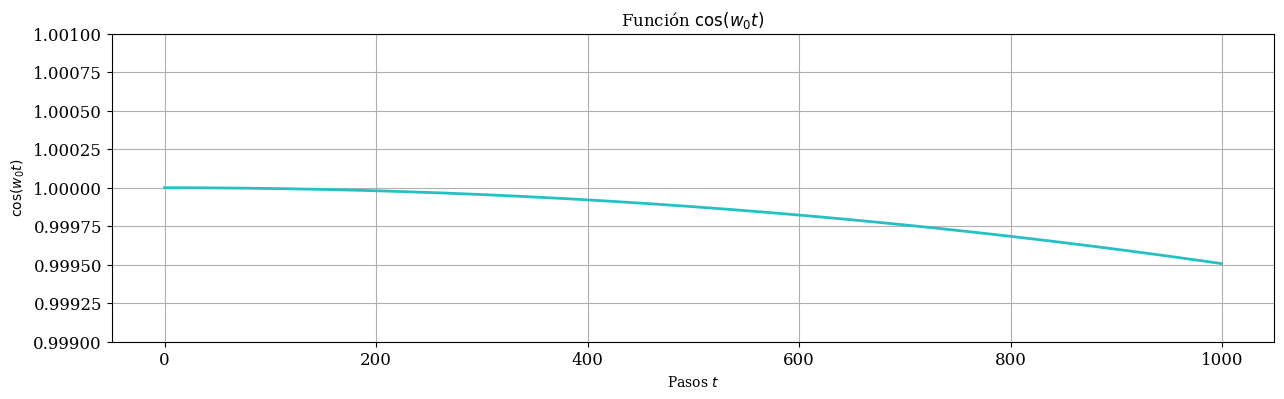

In [232]:
plt.figure(figsize=(15,4))
plt.plot(cosSignal, color = '#24C0C4', lw = 2)
plt.ylim([0.999, 1.001])
plt.grid()
plt.xlabel(r'Pasos $t$')
plt.ylabel(r'$\cos(w_0 t)$')
plt.title(r'Función $\cos(w_0t)$')
plt.show()

<p align="justify">
Como se puede observar en la gráfica, la función oscila lentamente. En 1000 pasos, la variación se ubica por debajo del 1% (incluso es mucho menor que este valor). De hecho, fue necesario ajustar el eje de visualización de la gráfica para poder observar el cambio a través de los pasos. El comportamiento presentado sugiere que en el intervalo de $t=[0,1000]$, la curva es un factor estático. Entonces, la media de los bandits $\mu_i=\beta_i+\cos(w_0t)$ será:

$$\mu_i = \beta_i + \cos(w_0t) \approx \mu_i = \beta_i + 1$$
<p align="justify">
En este caso, el escenario es estático y el promedio sobre las muestras determinará adecuadamente el valor de $\mu_i$. Por lo tanto, el valor que mejor se adapta a esta configuración de bandits es $\alpha_n=1/n$. Este valor garantiza las condiciones de convergencia y en el escenario planteado es consistente con la Ley de los Grandes Números.
<p align="justify">
A continuación, se realizará la implementación computacional de los bandits y se llevarán a cabo algunos experimentos para constatar que el mejor valor para $\alpha_n$ es $1/n$.

## Simulación medias de bandits

En la siguiente celda de codigo se construyen las medias $\beta_i$ para los 12 Bandits del problema. La mejor acción en todo momento será el máximo valor de $\beta_i$ en $\forall i = 1:12$.

In [233]:
k = 12
banditVariance = np.ones(k)
banditMeans = [np.random.normal(0, 1) for _ in range(k)]
print(f"Las medias mu de los bandtis son: ")
for num, mean in enumerate(banditMeans):
  print(f'Bandit {num}: {mean}')
betterAction = np.argmax(banditMeans)
print(f'\nLa mejor acción es {betterAction}')

Las medias mu de los bandtis son: 
Bandit 0: 0.2617408623718052
Bandit 1: 1.5520892377317514
Bandit 2: -1.5530146471148119
Bandit 3: 1.002738383342272
Bandit 4: 0.6659736162701213
Bandit 5: -0.2191562593720873
Bandit 6: -0.14956770082677492
Bandit 7: -0.49432394526564943
Bandit 8: 0.4439784663459097
Bandit 9: 0.03987430621748604
Bandit 10: -1.4063236936995431
Bandit 11: -0.9420098159093817

La mejor acción es 1


## Método $\epsilon$-greedy
<p align="justify">
En la siguiente función se implementa el método $\epsilon$-greedy para bandits dispuestos en la configuración no estática con medias $\mu_i+\cos(w_0t)$. Este método permite configurar el valor de $\alpha$ de forma constante en el intervalo $(0,1)$ o seleccionar el promedio sobre las muestras $\alpha_n=1/n$. Los factores constantes de $\alpha$ generan estimativos que son promedios pesados en los cuales el valor decrece exponencialmente a través de las recompensas pasadas en $(1-\alpha)$. Por esta razón, valores cercanos a la unidad generan ponderaciones que priorizan las recompensas actuales y no las pasadas. En el caso de $\alpha$ cercano a cero se pesan todos las recompensas con un nivel de ponderación similar.

In [234]:
def eGreedyMethod(epsilon, banditMeans, banditVariance, w0,
                  numberSteps, numberEpisodics, numberActions, 
                  estaticFactor = -1):
  # Función que calcula las recompensas promedio luego de usar el método e-greedy para 
  # buscar la mejor acción posible en el problema de multi-bandits. 
  # Los resultados se realizan para varios episodios (numberEpisodics) 
  # en cada episodio se realizan un número de iteraciones o pasos (numberSteps)

  # Parámetros:
  # epsilon: factor del método e-greedy
  # banditEvns: clase que simula el problema de multi-bands
  # banditScenery: elección del escenario del problema 1, 2, 3
  # numberSteps: número de iteraciones en cada episodio
  # numberEpisodics: número de episodios
  # numberActions: número de acciones disponibles para tomar
  # estaticFactor: indica al algoritmo si se quiere trabajar de forma estatica (-1) o no, 
  #                en el último caso se debe incluir un número entre 0 y 1 para ser **

  # Salidas:
  # rewardsMean: promedio de las recompensas en cada iteración para el total de episodios
  # meanCountActions: promedio del número de acciones tomadas en cada episodio

  
  actionsAvaliable = range(numberActions)
  rewardsMean = np.zeros((numberSteps,))
  meanCountActions = np.zeros((numberActions,))

  for j in range(numberEpisodics):
    Q = np.zeros((numberActions))
    rewards = []
    actionsTaken = []
    for i in range(numberSteps):
      actionGreedy = np.argmax(Q)
      probabilitiesAction = (epsilon/numberActions)*np.ones((numberActions))
      probabilitiesAction[actionGreedy] = 1-epsilon + (epsilon/numberActions)
      action = random.choices(actionsAvaliable, weights=probabilitiesAction, k=1)[0]
      actionsTaken.append(action)
      # Generación de bandits con media afectada por np.cos(w0*t)
      reward = np.random.normal(banditMeans[action]+ np.cos(w0*i), banditVariance[action])  
      rewards.append(reward)
      if estaticFactor == -1:
        Q[action] += (1/actionsTaken.count(action))*(reward - Q[action])
      elif 0 <= estaticFactor and estaticFactor <= 1:
        Q[action] += (estaticFactor)*(reward - Q[action])
      else:
        print('Ingreso un valor invalido para estaticFactor')
        print('\nIngrese un número entre 0 y 1, o indique -1 para método estatico')
    rewardsMean = rewardsMean + (1/(j+1))* (rewards - rewardsMean)
    countActions  = np.bincount(actionsTaken, minlength=numberActions)
    meanCountActions = meanCountActions + (1/(j+1))*(countActions-meanCountActions)
  return rewardsMean, meanCountActions*100/numberSteps

## Sintonización factor $\alpha$ en relacion a $\epsilon$

<p align="justify">
Para encontrar un factor adecuado para $\alpha$, se realizará un barrido entre posibles valores constantes de este factor y se incluirá la versión de promedio de muestras $\alpha_n = 1/n$. La variación de los valores de $\alpha$ se realizará en conjunto con la variación de valores para el parámetro $\epsilon$. Esto no se hace para encontrar una buena combinación de estos parámetros, sino para analizar los resultados de los valores de $\alpha$ frente a diferentes configuraciones de $\epsilon$.
<p align="justify">
Los valores de $\alpha$ considerados para la variación se encuentran distribuidos desde 0.1 hasta 0.9, variando en pasos de 0.2. Aunque la búsqueda no es lo suficientemente precisa, se logra establecer una idea del comportamiento del parámetro. Como métricas para analizar los resultados, se propone el promedio de la recompensa. En este caso, este valor será el promedio de todos los pasos para la señal de recompensa promediada en varios episodios. Esta medida se acompaña de la desviación estándar de la recompensa promediada en los episodios. Además, se indica el promedio del porcentaje de veces que se elige la mejor acción.

In [235]:
epsilons = [0.01, 0.05, 0.1, 0.2, 0.5] # Valores para el hiper-parámetro epsilon
alphas = [-1, 0.1, 0.3, 0.5, 0.7, 0.9] # Valores para el hiper-parámetro alpha, alpha -1 indica implementación estática

meanRewardEpsilonAlpha = np.empty((5, 6))
stdRewardEpsilonAlpha = np.empty((5, 6))
meanCountEpsilonAlpha = np.empty((5, 6))

numberSteps = 1000
numberEpisodics = 100
numberActions = k
w0 = math.pi/100000
j = 0
for alpha in alphas:
  i = 0
  for epsilon in epsilons:
    rewardsMean, meanCountAction = eGreedyMethod(epsilon, banditMeans, banditVariance, w0, numberSteps, 
                                                  numberEpisodics, numberActions, alpha)
    meanCountEpsilonAlpha[i][j] = np.mean(meanCountAction[betterAction])
    meanRewardEpsilonAlpha[i][j] = np.mean(rewardsMean)
    stdRewardEpsilonAlpha[i][j] = np.std(rewardsMean)
    i += 1
  j += 1 

<p align="justify">
Para facilitar la interpretación de los resultados, los mapas de calor se presentarán como una comparativa por filas. En cada fila, se utilizarán colores para indicar el valor máximo de la métrica para los distintos valores del parámetro $\alpha$ en las columnas. Además, se incluirá la información correspondiente al valor de la métrica para cada configuración de parámetros como anotaciones en el mapa de calor.

In [236]:
meanRewardEpsilonAlphaDF = pd.DataFrame(meanRewardEpsilonAlpha)
meanRewardEpsilonAlphaDFN = meanRewardEpsilonAlphaDF.div(meanRewardEpsilonAlphaDF.max(axis=1), axis=0)

stdRewardEpsilonAlphaDF = pd.DataFrame(stdRewardEpsilonAlpha)
stdRewardEpsilonAlphaDFN = stdRewardEpsilonAlphaDF.div(stdRewardEpsilonAlphaDF.max(axis=1), axis=0)

meanCountEpsilonAlphaDF = pd.DataFrame(meanCountEpsilonAlpha)
meanCountEpsilonAlphaDFN = meanCountEpsilonAlphaDF.div(meanCountEpsilonAlphaDF.max(axis=1), axis=0)

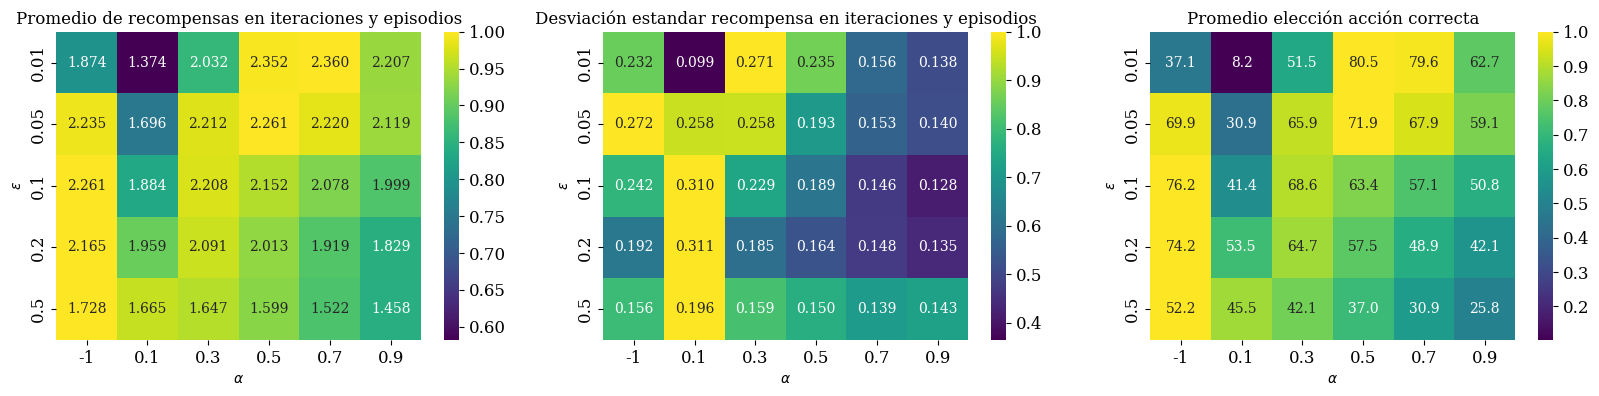

In [237]:
fig, ax = plt.subplots(1,3, figsize=(20,4))
sns.heatmap(meanRewardEpsilonAlphaDFN, fmt='.3f', cmap='viridis', ax = ax[0], annot = meanRewardEpsilonAlphaDF)
sns.heatmap(stdRewardEpsilonAlphaDFN, fmt='.3f', cmap='viridis', ax = ax[1], annot = stdRewardEpsilonAlphaDF)
sns.heatmap(meanCountEpsilonAlphaDFN, fmt='.1f', cmap='viridis', ax = ax[2], annot = meanCountEpsilonAlphaDF)

ax[0].set_xticklabels(alphas)
ax[0].set_yticklabels(epsilons)
ax[0].set_xlabel('$\\alpha$')
ax[0].set_ylabel('$\epsilon$')
ax[0].set_title('Promedio de recompensas en iteraciones y episodios')

ax[1].set_xticklabels(alphas)
ax[1].set_yticklabels(epsilons)
ax[1].set_xlabel('$\\alpha$')
ax[1].set_ylabel('$\epsilon$')
ax[1].set_title('Desviación estandar recompensa en iteraciones y episodios')


ax[2].set_xticklabels(alphas)
ax[2].set_yticklabels(epsilons)
ax[2].set_xlabel('$\\alpha$')
ax[2].set_ylabel('$\epsilon$')
ax[2].set_title('Promedio elección acción correcta')

plt.show()

<p align="justify">
Para analizar estos resultados y establecer un parámetro $\alpha$ deseable, es necesario comparar las columnas del mapa de calor. Se espera que el valor óptimo sea aquel que, en la mayoría de los métodos con distintos valores de $\epsilon$, alcance el mayor promedio de recompensa, la menor desviación estándar y el mayor porcentaje de veces en las que se selecciona la acción correcta. De esta manera, se puede encontrar el valor de $\alpha$ que maximice el rendimiento del modelo en términos de recompensa, estabilidad y precisión en la selección de acciones.
<p align="justify">
En el primer mapa de calor se puede observar que la columna correspondiente al factor $\alpha = -1$ (que indica el promedio tomando $\alpha_n = 1/n$ en cada iteración) obtiene valores de recompensa más altos en la mayoría de los casos, excepto para $\epsilon = 0.01$. Con relación a esta métrica se puede concluir que para la mayoría de los valores de $\epsilon$, el mejor factor para $\alpha$ es $\alpha_n = 1/n$. En el segundo mapa, que indica la desviación estándar de la señal de recompensa a lo largo de los episodios y los pasos, se puede observar que los valores más bajos se encuentran en la parte superior derecha. Sin embargo, la variación de estos valores no es muy marcada en las distintas configuraciones de los parámetros. En el tercer mapa de calor, que indica el promedio del porcentaje de veces que se tomó la mejor acción, se puede verificar que los mejores valores ocurren cuando se utiliza el factor $\alpha_n = 1/n$. Aunque este valor no es el mejor para $\epsilon = 0.05$ y $\epsilon = 0.01$, se obtienen resultados superiores para los demás valores de $\epsilon$.
<p align="justify">
Por otra parte, al analizar los tres mapas de calor, se puede establecer que el mejor valor para $\epsilon$ es 0.1, ya que en este valor la mayoría de las configuraciones de $\alpha$ muestran buenos resultados. Con el fin de verificar con mayor rigor los experimentos sobre la elección de $\alpha$, se ha decidido fijar el valor de $\epsilon = 0.1$ y realizar un análisis con más episodios y más valores de $\alpha$ en el siguiente apartado. De esta manera, se podrá evaluar con mayor detalle el rendimiento del modelo en diferentes configuraciones de $\alpha$ y determinar cuál es el mejor valor para maximizar la recompensa y la precisión en la selección de acciones.

## Sintonización factor $\alpha$

<p align="justify">
En el siguiente análisis, se ha fijado el valor de $\epsilon$ en 0.1 y se ha propuesto una variación para $\alpha$ constante, comenzando en 0.1 y finalizando en 0.9, con incrementos de 0.1. Una vez finalizada esta simulación, se presentan los resultados de la evolución temporal de la señal de recompensa promedio a través de los episodios, diagramas de caja y bigotes para la recompensa en episodios y pasos, y un diagrama de barras que indica el porcentaje promedio de acciones tomadas.

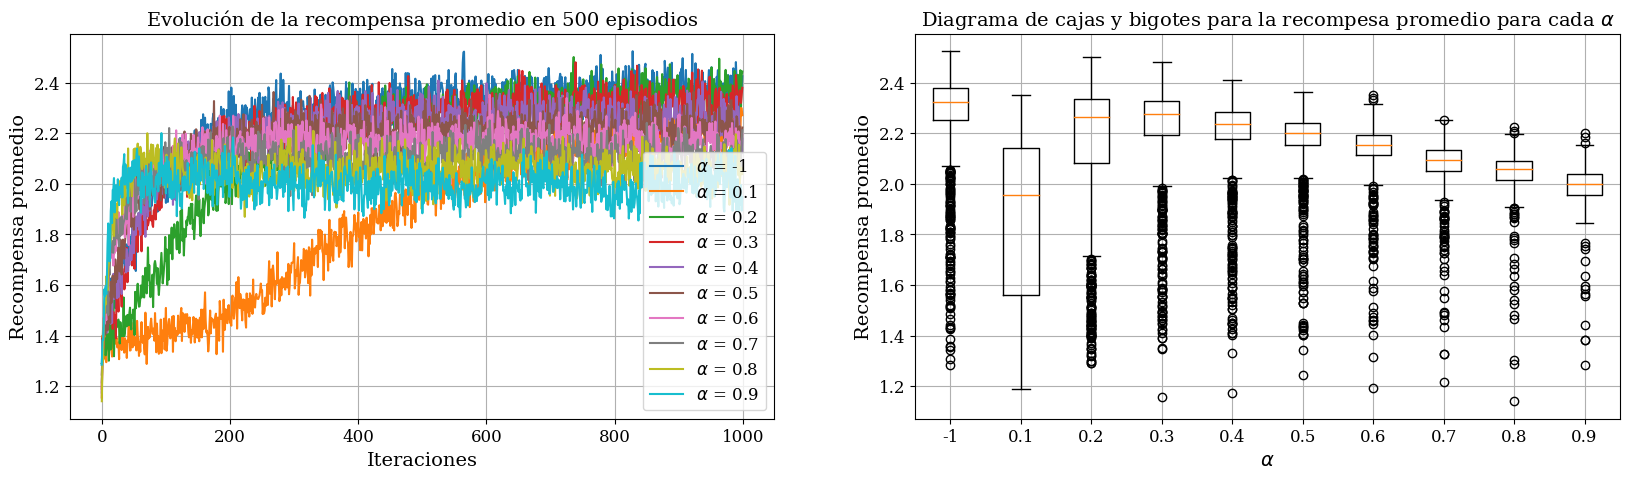

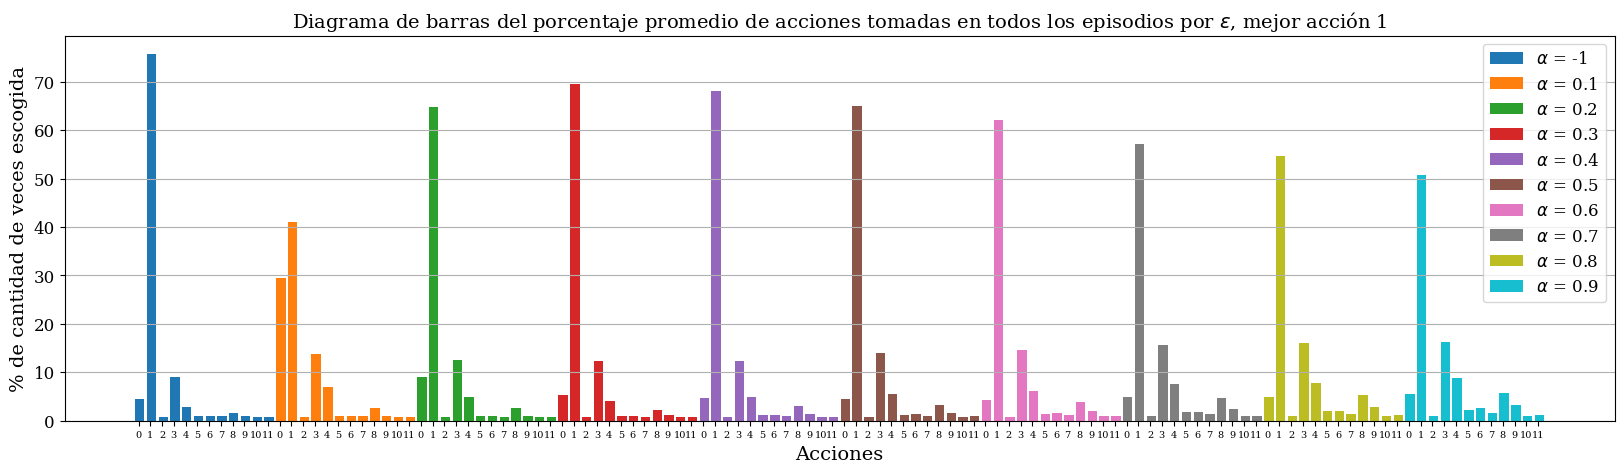

In [238]:
# Valores para el hiper-parámetro alpha
# El valor -1 indica la configuración alpha_n = 1/n 
alphas = [-1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] 

rewardsByAlphas = {}
countActionsByAlphas = {}
numberEpisodics = 500

fig, ax = plt.subplots(1,2, figsize=(20,5))

for alpha in alphas:
  rewardsMean, meanCountActions = eGreedyMethod(0.1, banditMeans, banditVariance, w0, numberSteps, 
                                                numberEpisodics, numberActions, alpha)
  rewardsByAlphas[alpha] = rewardsMean
  countActionsByAlphas[alpha] = meanCountActions
  # gráfica de la evoluación de la recompensa promedio 
  ax[0].plot(rewardsMean, label=f'$\\alpha$ = {alpha}')

# Configuración aspecto de la gráfica de la evolución de la recompensa promedio    
ax[0].set_title(f'Evolución de la recompensa promedio en {numberEpisodics} episodios', fontsize = 14)
ax[0].set_ylabel('Recompensa promedio', fontsize = 14)
ax[0].set_xlabel('Iteraciones', fontsize = 14)
ax[0].legend(fontsize=12)
ax[0].grid()

# Gráfica diagráma boxplot de la recompensa promedio para cada epsilon 
alphas, rewardsMean = rewardsByAlphas.keys(), rewardsByAlphas.values()
ax[1].boxplot(rewardsMean)
# Configuración aspecto de la gráfica boxplot
ax[1].set_title(f'Diagrama de cajas y bigotes para la recompesa promedio para cada $\\alpha$', fontsize = 14)
ax[1].set_ylabel('Recompensa promedio', fontsize = 14)
ax[1].set_xlabel('$\\alpha$', fontsize = 14)
ax[1].grid()
ax[1].set_xticklabels(alphas)

# Gráfica del promedio de acciones tomadas en todos los métodos
actionsAvaliable = np.arange(numberActions)
plt.figure(figsize=(20,5))
space = 0.1
for alpha in alphas:
  plt.bar(actionsAvaliable + space, countActionsByAlphas[alpha], label = f'$\\alpha$ = {alpha}')
  space += numberActions
plt.xticks(np.arange(120), np.tile(np.arange(12),len(alphas)), fontsize = 7)
plt.title(f'Diagrama de barras del porcentaje promedio de acciones tomadas en todos los episodios por $\epsilon$, mejor acción {betterAction}', 
          fontsize = 14)
plt.xlabel('Acciones', fontsize = 14)
plt.ylabel('% de cantidad de veces escogida', fontsize = 14)
plt.grid(axis='y')
plt.legend(fontsize=12)
plt.show()

<p align="justify">
Al fijar el valor de $\epsilon$, se ha obtenido un comportamiento específico de la recompensa promedio, que se puede observar en las gráficas generadas. En el diagrama de cajas y bigotes, se puede apreciar que la selección de $\alpha_n = 1/n$ como factor de actualización genera un valor medio de recompensa mayor respecto a los valores constantes de $\alpha$ considerados. Además, en esta configuración, la desviación estándar es pequeña y comparable con los otros valores de $\alpha$, en los cuales se alcanzan menores dispersiones pero también menores valores promedio. 

<p align="justify">
En el diagrama que muestra el porcentaje promedio de acciones tomadas, se puede verificar que la elección de $\alpha_n = 1/n$ maximiza el porcentaje de veces que se toma la acción correcta, situándose por encima del 70%. Ninguno de los valores de $\alpha$ evaluados supera este resultado. Esto indica que la elección de $\alpha_n = 1/n$ es la mejor opción para este problema, ya que maximiza tanto la recompensa como la precisión en la selección de acciones. 

<font color="#24C0C4" size = 3 align = "justify">
Por las consideraciones expuestas se puede establecer que para el escenario con Bandits con media $\mu_i = \beta_i + \cos(w_0 t)$ y frecuencia de oscilación $w_0 = \pi/100000$ la mejor elección de $\alpha$ corresponde a $\alpha = 1/t$. 
</font>

# Caso 2. $w_0 = \pi/1000$



<p align="justify">
En este escenario, la frecuencia $w_0$ implica un periodo de oscilación de $T=2000$. Por lo tanto, en $t=1000$, que es el horizonte de tiempo, los bandits habrán realizado únicamente la mitad del periodo de oscilación. Es decir, la señal de recompensa presentará un comportamiento afectado por medio ciclo de la señal coseno. Considere la gráfica de $\cos(w_0t)$  para esta frecuencia.

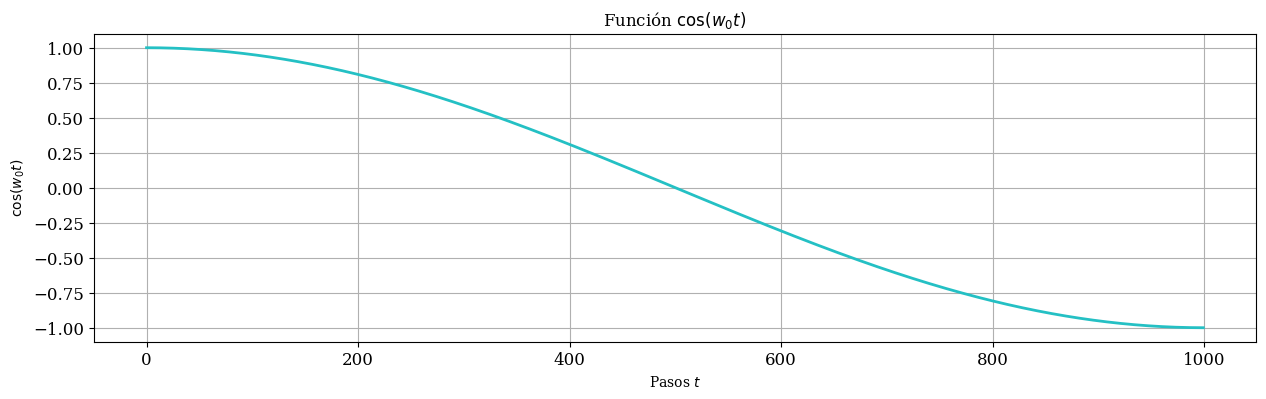

In [239]:
w0 = math.pi/1000
cosSignal = [np.cos(w0*t) for t in range(1000)]
plt.figure(figsize=(15,4))
plt.plot(cosSignal, color = '#24C0C4', lw = 2)
plt.grid()
plt.xlabel(r'Pasos $t$')
plt.ylabel(r'$\cos(w_0 t)$')
plt.title(r'Función $\cos(w_0t)$')
plt.show()

<p align="justify">
Como se puede observar en la gráfica, la función alcanza a desarrollar la mitad de su periodo. En 1000 pasos, la variación entre el valor más alto alcanzado y el menor es del 100%. El comportamiento presentado sugiere que en el intervalo de tiempo $t=[0,1000]$, la media definida como $\mu_i=\beta_i+\cos(w_0t)$ cambiará considerablemente a lo largo del tiempo.
<p align="justify">
En este caso, el escenario es no estático y el promedio sobre las muestras puede que no determine adecuadamente los estimativos de $q$. A pesar de que se tiene un desplazamiento de la media afectado por el tiempo, todos los Bandits considerados en este ejercicio tienen la misma afectación. Por lo tanto, la mejor acción corresponde al mayor valor de $\beta_i$, ya que esta será la acción que logre la mayor recompensa en todo momento. El problema radica en estimar adecuadamente este valor o un valor que permita identificar la mejor acción en todo momento.
<p align="justify">
A continuación, se realizarán algunos análisis y pruebas experimentales para definir un valor adecuado del parámetro $\alpha_n$ que permita encontrar la mejor acción a pesar de la variabilidad temporal de los Bandits.

## Análisis de estimación

<p align="justify">
Consideremos un solo Bandit que se comporta con media $\mu = \beta + \cos(w_0 t)$ y varianza 1. Para este Bandit, se requiere estimar en todo momento su media $\mu$ o el valor $\beta$, que como se planteó anteriormente, puede ayudar a resolver el problema de Multi-Armed Bandits. Los valores de $\mu$ o $\beta$ podrán ser estimados por cualquier metodología que permita obtener estimaciones precisas independientes del instante $t$.

<p align="justify">
El promedio total sobre una señal aleatoria con media $\mu_i = \beta_i + \cos(\pi/1000 t)$ en un horizonte de tiempo de $t= 1000$ será un estimado del valor $\beta_i$. Esto es válido cuando se usan todas las muestras de la señal, es decir, únicamente en el instante $t= 1000$ se puede obtener una estimación de $\beta_i$. A continuación, se presenta un ejemplo.

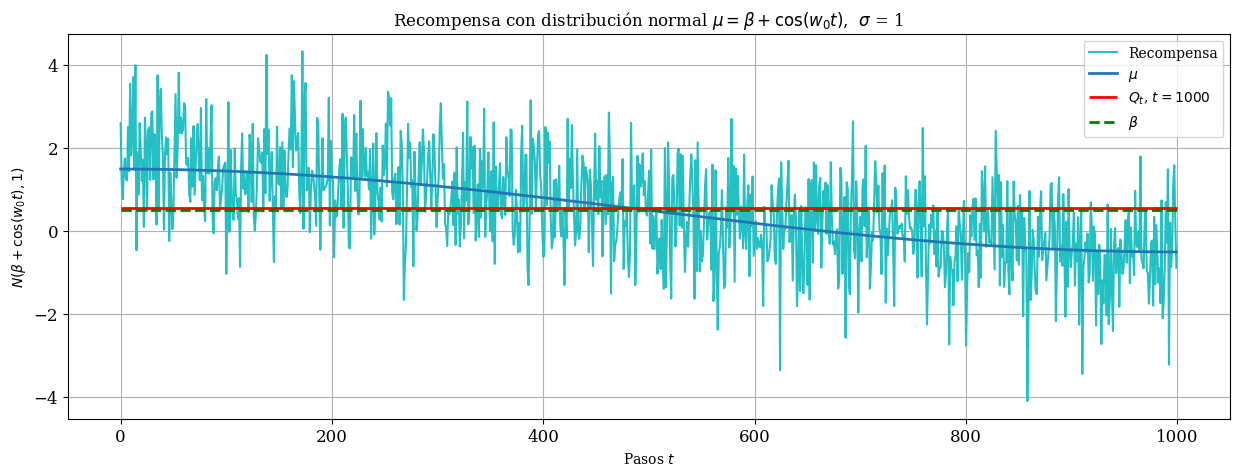



El valor de beta = 0.48882068212604946, el estimativo en el último paso usando todas las muestras es Q = 0.544382085451106


In [240]:
Q = 0
numberSteps = 1000
w0 = math.pi/1000
beta = np.random.normal(0, 1)
rewards = []
for t in range(numberSteps):
  R = np.random.normal(beta + np.cos(w0*t), 1) 
  Q += (1/(t+1))*(R - Q)
  rewards.append(R)

plt.figure(figsize=(15,5))
plt.xlabel(r'Pasos $t$')
plt.ylabel(r'$N(\beta + \cos(w_0 t),1)$')
plt.title(r'Recompensa con distribución normal $\mu = \beta + \cos(w_0t)$,  $\sigma$ = 1')
plt.plot(rewards, label = 'Recompensa', color = '#24C0C4')
plt.plot([beta + np.cos(w0*t) for t in range(numberSteps)], label = r'$\mu$', lw = 2)
plt.hlines(Q, 0, numberSteps, color = 'r', label = fr'$Q_t$, $t = {numberSteps}$', lw = 2)
plt.hlines(beta, 0, numberSteps, color = 'g', label = r'$\beta$', lw = 2, linestyles = 'dashed')
plt.legend()
plt.grid()
plt.show()
print('\n')
print(f'El valor de beta = {beta}, el estimativo en el último paso usando todas las muestras es Q = {Q}')

<p align="justify">
Sin embargo, el promedio estimado como $Q_{t+1} = (1/n) (R_n - Q_n)$ va cambiando a medida que se reciben más muestras, es decir, se actualiza con el número de muestras. Al tener una media que cambia con el tiempo, es posible que este valor se encuentre sesgado. Consideremos el siguiente ejemplo.

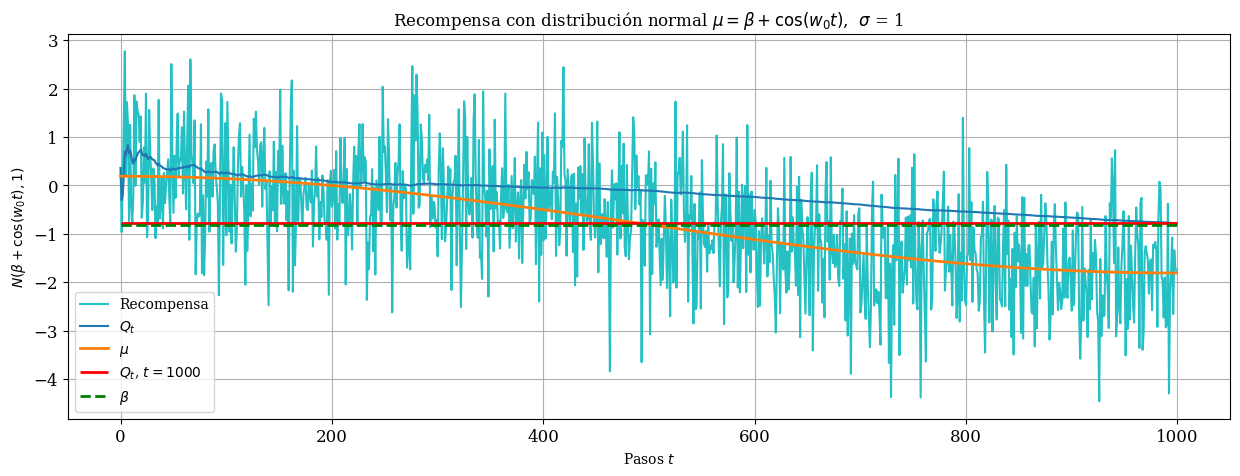

In [241]:
Q = 0
numberSteps = 1000
w0 = math.pi/1000
beta = np.random.normal(0, 1)
rewards = []
estimatedQ = []
for t in range(numberSteps):
  R = np.random.normal(beta + np.cos(w0*t), 1) 
  Q += (1/(t+1))*(R - Q)
  rewards.append(R)
  estimatedQ.append(Q)

plt.figure(figsize=(15,5))
plt.xlabel(r'Pasos $t$')
plt.ylabel(r'$N(\beta + \cos(w_0 t),1)$')
plt.title(r'Recompensa con distribución normal $\mu = \beta + \cos(w_0t)$,  $\sigma$ = 1')
plt.plot(rewards, label = 'Recompensa', color = '#24C0C4')
plt.plot(estimatedQ, label = r'$Q_t$')
plt.plot([beta + np.cos(w0*t) for t in range(numberSteps)], label = r'$\mu$', lw = 2)
plt.hlines(Q, 0, numberSteps, color = 'r', label = fr'$Q_t$, $t = {numberSteps}$', lw = 2)
plt.hlines(beta, 0, numberSteps, color = 'g', label = r'$\beta$', lw = 2, linestyles = 'dashed')
plt.legend()
plt.grid()
plt.show()

<p align="justify">
Como se puede apreciar en la gráfica, el valor estimado a través del tiempo tiene un sesgo respecto a la estimación de $\mu$ o $\beta$. En cuanto a $\beta$, el valor estimado coincide en las iteraciones finales, pero en las iniciales tiene un sesgo que corresponde aproximadamente a $\cos(\frac{1}{2}w_0t)$. Esto quiere decir que como estimador del valor de $\beta$, la técnica está sesgada en las primeras muestras. En cuanto a la estimación de $\mu$, pese a que cambia con el tiempo, la estimación promedio parece tender a tener una frecuencia de oscilación que corresponde a la mitad de $w_0$. 

Por otra parte, al utilizar valores constantes de $\alpha$ distribuidos en el intervalo $(0,1)$, el promedio es onderado exponencialmente teniendo en cuenta muestras actuales y ponderado exponencialmente decreciente por $(1 - \alpha)$ en las muestras anteriores. A continuación, se presenta un ejemplo.

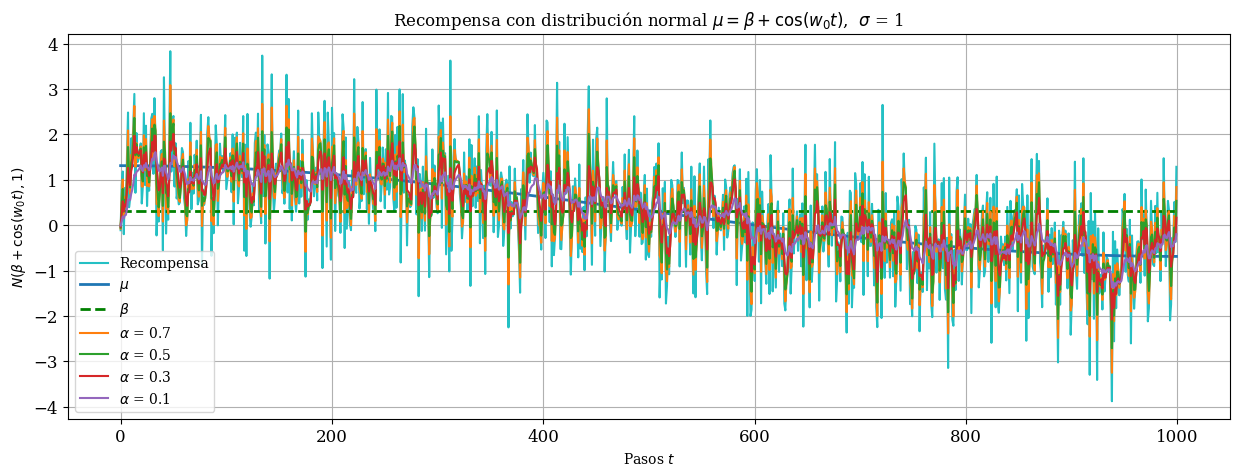

In [242]:
Q = 0
numberSteps = 1000
w0 = math.pi/1000
beta = np.random.normal(0, 1)
rewards = []
estimatedQ = []
estimatedQbyAlphas = {}
alphas = [0.1, 0.3, 0.5, 0.7]

for t in range(numberSteps):
  R = np.random.normal(beta + np.cos(w0*t), 1) 
  Q += (1/(t+1))*(R - Q)
  rewards.append(R)
  estimatedQ.append(Q)

plt.figure(figsize=(15,5))
plt.xlabel(r'Pasos $t$')
plt.ylabel(r'$N(\beta + \cos(w_0 t),1)$')
plt.title(r'Recompensa con distribución normal $\mu = \beta + \cos(w_0t)$,  $\sigma$ = 1')
plt.plot(rewards, label = 'Recompensa', color = '#24C0C4')
plt.plot([beta + np.cos(w0*t) for t in range(numberSteps)], label = r'$\mu$', lw = 2)
plt.hlines(beta, 0, numberSteps, color = 'g', label = r'$\beta$', lw = 2, linestyles = 'dashed')

alphas.reverse()
for alpha in alphas: 
  Qa = 0
  estimatedbyAlpha = []
  for t in range(numberSteps):
    Qa += alpha*(rewards[t] - Qa)
    estimatedbyAlpha.append(Qa)
  estimatedQbyAlphas[alpha] = estimatedbyAlpha
  plt.plot(estimatedQbyAlphas[alpha], label = f'$\\alpha$ = {alpha}')

plt.legend()
plt.grid()
plt.show()

<p align="justify">
Como se puede apreciar en el gráfico, al tener promedios pesados exponencialmente decrecientes, el estimador aumenta su variabilidad. Para valores de $\alpha$ cercanos a 1, únicamente se tienen en cuenta las recompensas actuales, lo que explica por qué la gráfica para $\alpha = 0.7$ se comporta de manera similar a la distribución original. En el caso de valores cercanos a cero, se puede observar que el estimador $Q$ trata de seguir las dinámicas de $\mu$ sin mucha variabilidad, lo que implica que es un mejor estimador que el promedio sobre las muestras. A continuación se propone un experimento para analizar, en varios episodios, el estimador de $\mu$ usando $\alpha = 0.1$ y $\alpha = 0.2$.

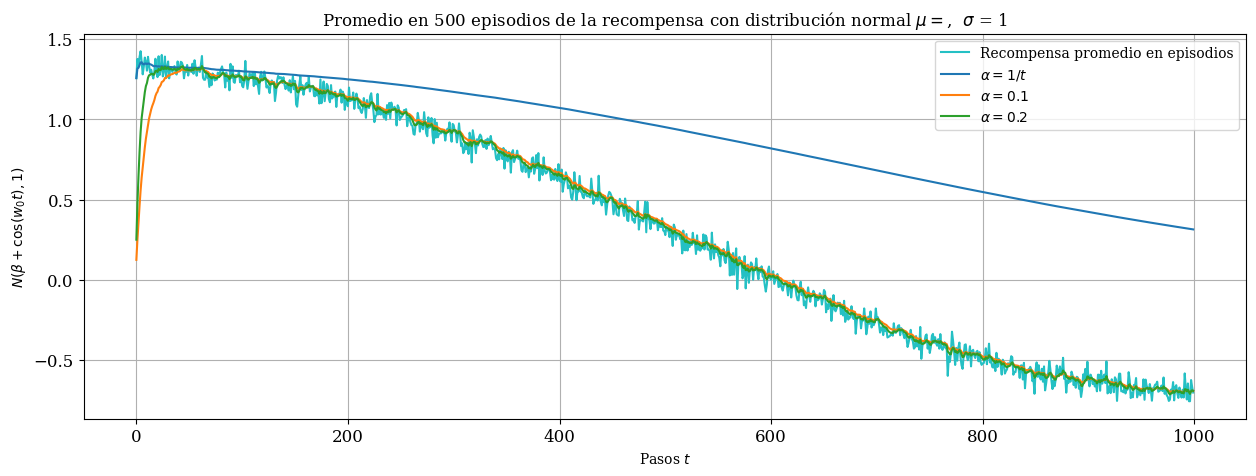

In [243]:
numberEpisodics = 500
numberSteps = 1000

rewardsMean = np.zeros((numberSteps,))

estimateMuMean = np.zeros((numberSteps,))
estimateMuAlpha1 = np.zeros((numberSteps,))
estimateMuAlpha2 =  np.zeros((numberSteps,))

estimateMean = 0
estimateS = 0

alpha1 = 0.1
alpha2 = 0.2

for j in range(numberEpisodics):
  rewards = []
  Qtime = []
  Qtime1 = []
  Qtime2 = []
  Q = 0
  Q1 = 0
  Q2 = 0
  for t in range(1000):
    reward = np.random.normal(beta + np.cos(w0*t), 1) 
    rewards.append(reward)

    Q += (1/(t+1))*(reward - Q)
    Q1 += (alpha1)*(reward - Q1)
    Q2 += (alpha2)*(reward - Q2)

    Qtime.append(Q)
    Qtime1.append(Q1)
    Qtime2.append(Q2)

  rewardsMean +=  (1/(j+1))* (rewards - rewardsMean)
  estimateMuMean +=  (1/(j+1))* (Qtime - estimateMuMean)
  estimateMuAlpha1 +=  (1/(j+1))* (Qtime1 - estimateMuAlpha1)
  estimateMuAlpha2 +=  (1/(j+1))* (Qtime2 - estimateMuAlpha2)

plt.figure(figsize=(15,5))
plt.xlabel(r'Pasos $t$')
plt.ylabel(r'$N(\beta + \cos(w_0 t),1)$')
plt.title(f'Promedio en {numberEpisodics} episodios de la recompensa con distribución normal $\mu = \beta + \cos(w_0t)$,  $\sigma$ = 1')  
plt.plot(rewardsMean, label = 'Recompensa promedio en episodios', color = '#24C0C4')
plt.plot(estimateMuMean, label = r'$\alpha = 1/t$')
plt.plot(estimateMuAlpha1, label = r'$\alpha = 0.1$')
plt.plot(estimateMuAlpha2, label = r'$\alpha = 0.2$')
plt.grid()
plt.legend()
plt.show()

<p align="justify">
Como se puede observar en la gráfica si se realiza un promedio ponderado pesado con factores $\alpha$ constantes, valores cercanos a 0.1 o 0.2 podrán estimar el valor $\mu$ de forma adecuada en cada instante del tiempo. Si el problema únicamente se restringiera a estimar el valor $\mu$ en el tiempo, estos valores de $\alpha$ resolverían adecuadamente el requerimiento. Sin embargo, en el contexto Multi Armed Bandits, si bien es necesario un buen estimador del valor esperado de la recompensa, el problema no solo se limita a esto. En la siguiente sección se realiza un análisis en el contexto Multi Armed Bandit.

## Análisis estimación en el contexto Bandits

<p align="justify">
Del análisis previo se concluye que para estimar adecuadamente la media $\mu$ de los Bandits afectados por una señal coseno con frecuencia $\pi / 1000$, se deben utilizar valores del parámetro $\alpha$ entre 0.1 y 0.2. Sin embargo, en el contexto de Multi Armed Bandits, hay momentos en los que no se tienen realizaciones de recompensa para todos los Bandits. Esto se debe a la naturaleza del problema que permite elegir exclusivamente una acción en cada instante y a la necesidad de establecer exploración y explotación. Al explorar se garantiza la selección de todas las acciones, pero no necesariamente en un patrón correlacionado en el tiempo. Por ejemplo, supongamos que para cierto Bandit se tienen recompensas en los instantes $t = 2, 3, 4$, y una nueva recompensa aparece en el instante $t= 500$. En este escenario, la variación de la media que generaron estas recompensas se encuentra alejada por un factor cercano a la unidad, y el promedio pesado ponderado no es fiable ya que no usa recompensas cercanas entre sí. En este caso, se puede utilizar una medida en el instante $500$ promediando las recompensas de los instantes 2, 3, 4 por factores $(\alpha - 1)^{t-i}$, pero dado que son pocas las recompensas observadas y el tiempo transcurrido es amplio, una ponderación con factores cercanos a cero dará pesos similares a las observaciones pasadas, que ocurrieron mucho antes. Por el contrario, factores cercanos a 1 promueven que únicamente se tenga en cuenta la recompensa actual, lo que limita la cantidad de muestras utilizadas para estimar.
<p align="justify">
Por otra parte, recordando que todas las medias de los Bandits están afectadas por el mismo patrón cíclico, pese a que el promedio sobre las muestras estima valores sesgados, este sesgo será el mismo para todos los Bandits. Esto implica que, aun con un sesgo hacia arriba, la estimación de $\mu$ sobre todos los Bandits permitirá encontrar siempre la mejor acción. Por esto, y teniendo en cuenta el análisis descrito anteriormente, se considera que la mejor elección del parámetro es $\alpha_n = 1/n$. A continuación, se realizará una serie de experimentos que permitirán sustentar esta afirmación. 

## Simulación medias de Bandits

In [244]:
np.random.seed(2023)

k = 12
w0 = math.pi / 1000
banditVariance = np.ones(k)
banditMeans = [np.random.normal(0, 1) for _ in range(k)]
print(f"Las medias mu de los bandtis son: ")
for num, mean in enumerate(banditMeans):
  print(f'Bandit {num}: {mean}')
betterAction = np.argmax(banditMeans)
print(f'\nLa mejor acción es {betterAction}')

Las medias mu de los bandtis son: 
Bandit 0: 0.7116735302628457
Bandit 1: -0.3244849560916726
Bandit 2: -1.0018706386598804
Bandit 3: 0.23625079403025182
Bandit 4: -0.10215984129468976
Bandit 5: -1.141292625436449
Bandit 6: 2.654407260948932
Bandit 7: 1.4406051935240283
Bandit 8: 0.09890227037346239
Bandit 9: -3.121532153116367
Bandit 10: -1.0765216453990678
Bandit 11: -0.3256819577017176

La mejor acción es 6


## Sintonización del factor $\alpha$ en relación a $\epsilon$

<p align="justify">
Similar al escenario anterior se realiza una variación de los valores de $\alpha$ desde 0.1 hasta 0.9, variando en pasos de 0.2. Tambien se realiza una variación de los valores de $\epsilon$ para relacionar el desempeño logrado con cada uno de estos valores. Como métricas de compración se usan el promedio de todos los pasos para la señal de recompensa promediada en varios episodios, la desviación estándar de la recompensa promediada en los episodios y el promedio del porcentaje de veces que se elige la mejor acción. Las metricas se presentan en mapas de calor que indican el mayor valor por fila. 

In [245]:
epsilons = [0.01, 0.05, 0.1, 0.2, 0.5] # Valores para el hiper-parámetro epsilon
alphas = [-1, 0.1, 0.3, 0.5, 0.7, 0.9] # Valores para el hiper-parámetro alpha, alpha -1 indica implementación estática

meanRewardEpsilonAlpha = np.empty((5, 6))
stdRewardEpsilonAlpha = np.empty((5, 6))
meanCountEpsilonAlpha = np.empty((5, 6))

numberSteps = 1000
numberEpisodics = 100
numberActions = k
w0 = math.pi/1000

j = 0
for alpha in alphas:
  i = 0
  for epsilon in epsilons:
    rewardsMean, meanCountAction = eGreedyMethod(epsilon, banditMeans, banditVariance, w0, numberSteps, 
                                                  numberEpisodics, numberActions, alpha)
    meanCountEpsilonAlpha[i][j] = np.mean(meanCountAction[betterAction])
    meanRewardEpsilonAlpha[i][j] = np.mean(rewardsMean)
    stdRewardEpsilonAlpha[i][j] = np.std(rewardsMean)
    i += 1
  j += 1 

In [246]:
meanRewardEpsilonAlphaDF = pd.DataFrame(meanRewardEpsilonAlpha)
meanRewardEpsilonAlphaDFN = meanRewardEpsilonAlphaDF.div(meanRewardEpsilonAlphaDF.max(axis=1), axis=0)

stdRewardEpsilonAlphaDF = pd.DataFrame(stdRewardEpsilonAlpha)
stdRewardEpsilonAlphaDFN = stdRewardEpsilonAlphaDF.div(stdRewardEpsilonAlphaDF.max(axis=1), axis=0)

meanCountEpsilonAlphaDF = pd.DataFrame(meanCountEpsilonAlpha)
meanCountEpsilonAlphaDFN = meanCountEpsilonAlphaDF.div(meanCountEpsilonAlphaDF.max(axis=1), axis=0)

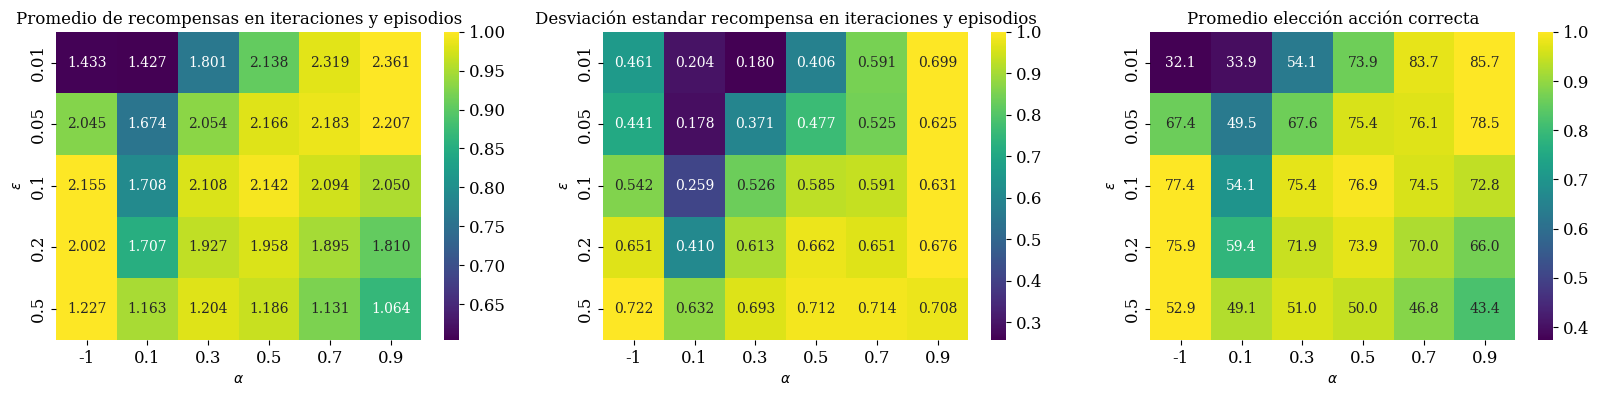

In [247]:
fig, ax = plt.subplots(1,3, figsize=(20,4))
sns.heatmap(meanRewardEpsilonAlphaDFN, fmt='.3f', cmap='viridis', ax = ax[0], annot = meanRewardEpsilonAlphaDF)
sns.heatmap(stdRewardEpsilonAlphaDFN, fmt='.3f', cmap='viridis', ax = ax[1], annot = stdRewardEpsilonAlphaDF)
sns.heatmap(meanCountEpsilonAlphaDFN, fmt='.1f', cmap='viridis', ax = ax[2], annot = meanCountEpsilonAlphaDF)

ax[0].set_xticklabels(alphas)
ax[0].set_yticklabels(epsilons)
ax[0].set_xlabel('$\\alpha$')
ax[0].set_ylabel('$\epsilon$')
ax[0].set_title('Promedio de recompensas en iteraciones y episodios')

ax[1].set_xticklabels(alphas)
ax[1].set_yticklabels(epsilons)
ax[1].set_xlabel('$\\alpha$')
ax[1].set_ylabel('$\epsilon$')
ax[1].set_title('Desviación estandar recompensa en iteraciones y episodios')


ax[2].set_xticklabels(alphas)
ax[2].set_yticklabels(epsilons)
ax[2].set_xlabel('$\\alpha$')
ax[2].set_ylabel('$\epsilon$')
ax[2].set_title('Promedio elección acción correcta')

plt.show()

<p align="justify">
Similar al caso anterior, para analizar estos resultados y establecer un parámetro $\alpha$ deseable, es necesario comparar las columnas del mapa de calor. El mejor valor de $\alpha$ sera aque que en la mayoría de los métodos con distintos valores de $\epsilon$, alcance el mayor promedio de recompensa, la menor desviación estándar y el mayor porcentaje de veces en las que se selecciona la acción correcta.
<p align="justify">
En el primer mapa de calor se puede observar que la columna correspondiente al factor $\alpha = -1$ (que indica el promedio tomando $\alpha_n = 1/n$ en cada iteración) obtiene valores de recompensa más altos en la mayoría de los casos, excepto para $\epsilon = 0.01$. Con relación a esta métrica se puede concluir que para la mayoría de los valores de $\epsilon$, el mejor factor para $\alpha$ es $\alpha_n = 1/n$. En el segundo mapa, que indica la desviación estándar de la señal de recompensa a lo largo de los episodios y los pasos, se puede observar que los valores más bajos se encuentran para $\alpha = 0.1$. Sin embargo es donde menor valor promedio se alcanza. Finalmente, en el tercer mapa de calor, que indica el promedio del porcentaje de veces que se tomó la mejor acción, se puede verificar que los mejores valores ocurren cuando se utiliza el factor $\alpha_n = 1/n$. Aunque este valor no es el mejor para $\epsilon = 0.05$ y $\epsilon = 0.01$, se obtienen resultados superiores para los demás valores de $\epsilon$.
<p align="justify">
Además, al analizar los tres mapas de calor, se puede establecer que el mejor valor para $\epsilon$ es 0.1, ya que en este valor la mayoría de las configuraciones de $\alpha$ muestran buenos resultados. Con el fin de verificar con mayor rigor los experimentos sobre la elección de $\alpha$, se ha decidido fijar el valor de $\epsilon = 0.1$ y realizar un análisis con más episodios y más valores de $\alpha$ en el siguiente apartado. De esta manera, se podrá evaluar con mayor detalle el rendimiento del modelo en diferentes configuraciones de $\alpha$ y determinar cuál es el mejor valor para maximizar la recompensa y la precisión en la selección de acciones.

## Sintonización del factor $\alpha$

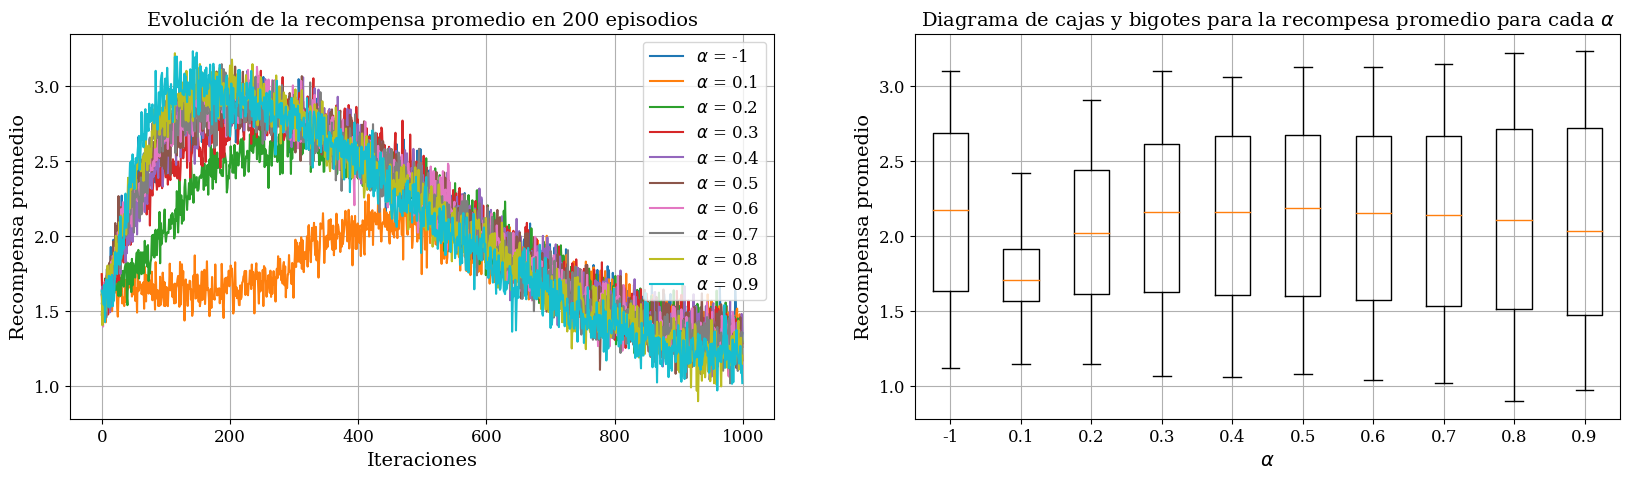

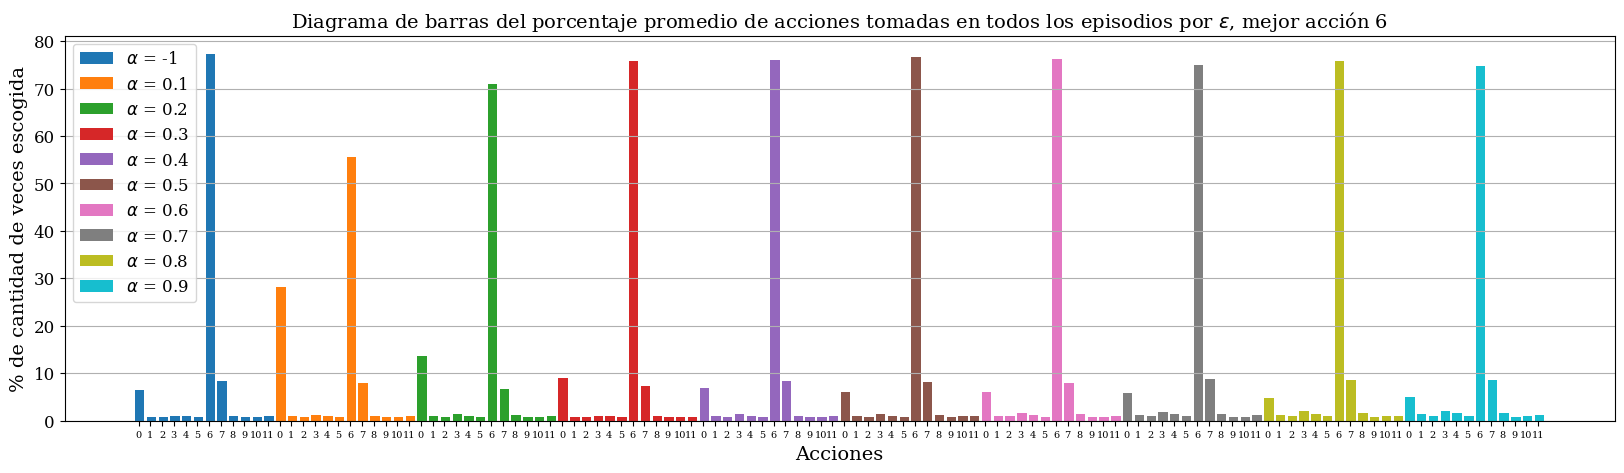

In [248]:
# Valores para el hiper-parámetro alpha
# El valor -1 indica la configuración alpha_n = 1/n 
alphas = [-1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] 

rewardsByAlphas = {}
countActionsByAlphas = {}
numberEpisodics = 200

fig, ax = plt.subplots(1,2, figsize=(20,5))

for alpha in alphas:
  rewardsMean, meanCountActions = eGreedyMethod(0.1, banditMeans, banditVariance, w0, numberSteps, 
                                                numberEpisodics, numberActions, alpha)
  rewardsByAlphas[alpha] = rewardsMean
  countActionsByAlphas[alpha] = meanCountActions
  # gráfica de la evoluación de la recompensa promedio 
  ax[0].plot(rewardsMean, label=f'$\\alpha$ = {alpha}')

# Configuración aspecto de la gráfica de la evolución de la recompensa promedio    
ax[0].set_title(f'Evolución de la recompensa promedio en {numberEpisodics} episodios', fontsize = 14)
ax[0].set_ylabel('Recompensa promedio', fontsize = 14)
ax[0].set_xlabel('Iteraciones', fontsize = 14)
ax[0].legend(fontsize=12)
ax[0].grid()

# Gráfica diagráma boxplot de la recompensa promedio para cada epsilon 
alphas, rewardsMean = rewardsByAlphas.keys(), rewardsByAlphas.values()
ax[1].boxplot(rewardsMean)
# Configuración aspecto de la gráfica boxplot
ax[1].set_title(f'Diagrama de cajas y bigotes para la recompesa promedio para cada $\\alpha$', fontsize = 14)
ax[1].set_ylabel('Recompensa promedio', fontsize = 14)
ax[1].set_xlabel('$\\alpha$', fontsize = 14)
ax[1].grid()
ax[1].set_xticklabels(alphas)

# Gráfica del promedio de acciones tomadas en todos los métodos
actionsAvaliable = np.arange(numberActions)
plt.figure(figsize=(20,5))
space = 0.1
for alpha in alphas:
  plt.bar(actionsAvaliable + space, countActionsByAlphas[alpha], label = f'$\\alpha$ = {alpha}')
  space += numberActions
plt.xticks(np.arange(120), np.tile(np.arange(12),len(alphas)), fontsize = 7)
plt.title(f'Diagrama de barras del porcentaje promedio de acciones tomadas en todos los episodios por $\epsilon$, mejor acción {betterAction}', 
          fontsize = 14)
plt.xlabel('Acciones', fontsize = 14)
plt.ylabel('% de cantidad de veces escogida', fontsize = 14)
plt.grid(axis='y')
plt.legend(fontsize=12)
plt.show()

<p align="justify">
Al fijar el valor de $\epsilon$, se ha obtenido un comportamiento de la recompensa promedio, que se puede observar en las gráficas generadas. En el diagrama de cajas y bigotes, se puede apreciar que la selección de $\alpha_n = 1/n$ como factor de actualización genera un valor medio de recompensa mayor respecto a los valores constantes de $\alpha$ considerados, aunque se puede analizar que los $\alpha$ 0.3, 0.4 y 0.5 se logra valores promedio similares. En esta configuración, la desviación estándar indica el ciclo de oscilación de la señal, por esta razón como métrica no indica algo en particular. En el caso de $\alpha = 0.1$ se puede establecer que la variación total de toda la señal es menor, ya que en las primera iteraciones la señal de recompensa presenta un valor bajo que no sigue al $\mu + \cos(w_0 t)$.

<p align="justify">
En el diagrama que muestra el porcentaje promedio de acciones tomadas, se puede verificar que la elección de $\alpha_n = 1/n$ maximiza el porcentaje de veces que se toma la acción correcta, situándose cerca al  80%. Ninguno de los valores de $\alpha$ evaluados supera este resultado, pero los valores $\alpha = 0.3, 0.4, 0.5$ tienen comportamiento similar. Esto indica que la elección de $\alpha_n = 1/n$ es la mejor opción para este problema, ya que maximiza tanto la recompensa como la precisión en la selección de acciones. Sin embargo, elegir valores para $\alpha = 0.3, 0.4, 0.5$ podría tambien conducir a resultados similares. 

<font color="#24C0C4" size = 3 align = "justify">
Por las consideraciones expuestas se puede establecer que para el escenario con Bandits con media $\mu_i = \beta_i + \cos(w_0 t)$ y frecuencia de oscilación $w_0 = \pi/1000$ la mejor elección de $\alpha$ corresponde a $\alpha_n = 1/n$. Pero factores constantes $\alpha = 0.3, 0.4, 0.5$ pueden también lograr resultados similares. 
</font>

# Interfaz

Este notebook se complementa con una interfaz interactiva disponible en https://mavivi95-bono1-main-xsusfq.streamlit.app/. En esta interfaz se pueden probar diferentes valores de $\alpha$ constantes para cada escenario, estos valores se comparan con la versión $\alpha_n = 1/n$. En los resultados de la interfaz se muestran los valores gráficos de la evolución de la señal de recompensa y diagramas de barras con el porcentaje promedio de las acciones tomadas. 